In [163]:
# Task 1: Import data

import pandas as pd
import numpy as np
data_file = "magic04.data"
var_names = [
    "fLength",           #1 continuous number: major axis of ellipse [mm]
    "fWidth",            #2 continuous number: minor axis of ellipse [mm] 
    "fSize",             #3 continuous number: 10-log of sum of content of all pixels [in #phot]
    "fConc",             #4 continuous number: ratio of sum of two highest pixels over fSize  [ratio]
    "fConc1",            #5 continuous number: ratio of highest pixel over fSize  [ratio]
    "fAsym",             #6 continuous number: distance from highest pixel to center, projected onto major axis [mm]
    "fM3Long",           #7 continuous number: 3rd root of third moment along major axis  [mm] 
    "fM3Trans",          #8 continuous number: 3rd root of third moment along minor axis  [mm]
    "fAlpha",            #9 continuous number: angle of major axis with vector to origin [deg]
    "fDist",             #10 continuous number: distance from origin to center of ellipse [mm]
    "class"              #11 class: g,h : gamma (signal), hadron (background) 
]
df_data = pd.read_csv(data_file, sep=",", names=var_names)
df_data2 = df_data.copy()

In [164]:
# Task 2: Count of dependent variable

print(df_data["class"].value_counts())

g    12332
h     6688
Name: class, dtype: int64


In [165]:
# converting g, h to 0, 1 for ROC curve later in the assignment
df_data["class"]=df_data["class"].map({'g':0,'h':1})

Populating the interactive namespace from numpy and matplotlib


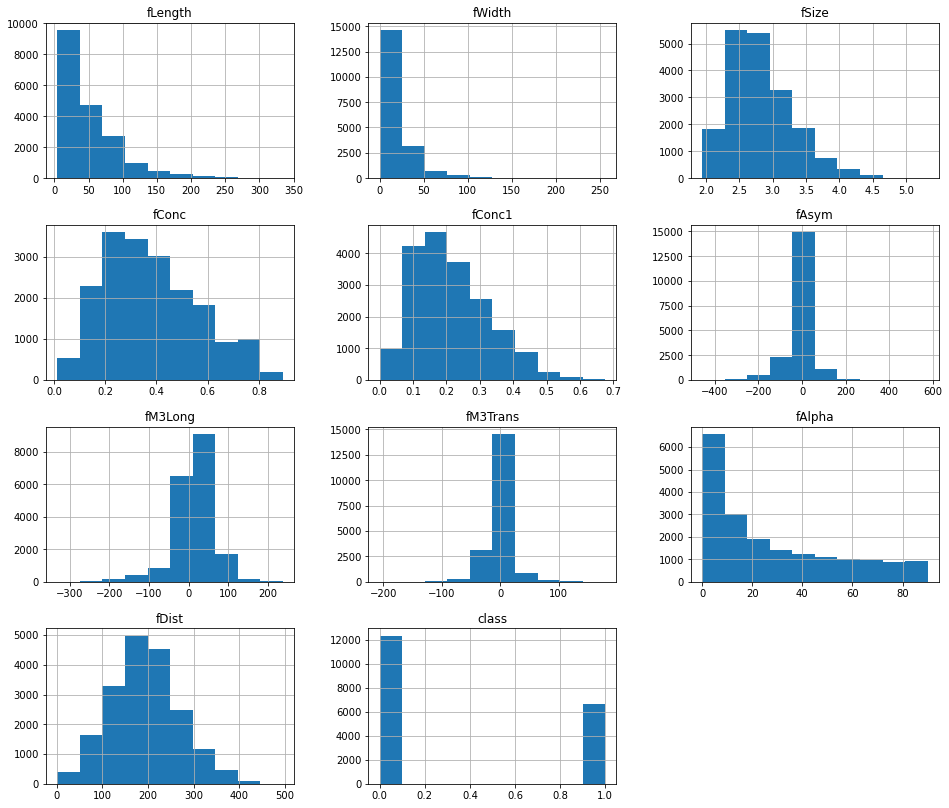

In [166]:
# Task 3: Histograms of the independent variables 

%pylab inline
df_data.hist(figsize=(16, 14));

In [167]:
# Task 4: Independent variable stats 

for var_name in var_names[0:10]:
    print("-"*50)
    print(var_name)
    print(df_data[var_name].describe())

--------------------------------------------------
fLength
count    19020.000000
mean        53.250154
std         42.364855
min          4.283500
25%         24.336000
50%         37.147700
75%         70.122175
max        334.177000
Name: fLength, dtype: float64
--------------------------------------------------
fWidth
count    19020.000000
mean        22.180966
std         18.346056
min          0.000000
25%         11.863800
50%         17.139900
75%         24.739475
max        256.382000
Name: fWidth, dtype: float64
--------------------------------------------------
fSize
count    19020.000000
mean         2.825017
std          0.472599
min          1.941300
25%          2.477100
50%          2.739600
75%          3.101600
max          5.323300
Name: fSize, dtype: float64
--------------------------------------------------
fConc
count    19020.000000
mean         0.380327
std          0.182813
min          0.013100
25%          0.235800
50%          0.354150
75%          0.503700


In [168]:
# Task 5: Split the dataset 

from sklearn.model_selection import train_test_split
attributes = [col for col in var_names if col != "class"]
train_x, test_x, train_y, test_y = train_test_split(df_data[attributes], df_data["class"], test_size=0.4, random_state=123)

#### Task 6: Uses of validation 

Validation is used for various things including:
* Comparing the models that were generated by different algorithms in order to find the best model.
* Tuning model hyperparameters
* Selecting variables
* Detecting model overfitting

In [169]:
# Task 7: Logistic regression classifier 

from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=0)
model = algorithm.fit(train_x, train_y)
pred_y = model.predict(test_x)

from sklearn.metrics import classification_report
for line in classification_report(test_y, pred_y).split("\n"):
    print(line)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      4966
           1       0.74      0.59      0.65      2642

    accuracy                           0.78      7608
   macro avg       0.77      0.74      0.75      7608
weighted avg       0.78      0.78      0.78      7608



C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


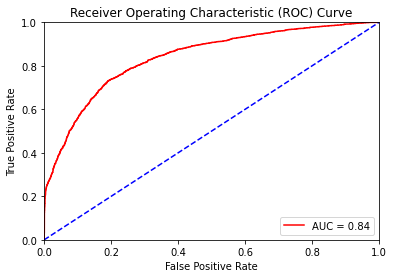

In [170]:
# Task 7: Logistic regression classifier ROC curve

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

y_score = algorithm.fit(train_x, train_y).decision_function(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_score)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Task 8: Describe the SVM algorithm 

The SVM (Support Vector Machine) algorithm is a supervised machine learning algorithm. It is typically used for classification, but it can also be used for regression. The SVM algorithm works by first finding hyper-planes that accurately separate data points into two classes. It then selects the hyper-plane that has the largest distance between itself and the nearest data point from each class. That hyper-plane is used as the decision boundary. This is why it is also known as the largest margin algorithm. 

In [171]:
# Task 9: Fit SVM classifiers 

from sklearn.svm import SVC
hypers = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 

for hyper in hypers:
    algorithm = SVC(C=hyper, random_state=1)
    model = algorithm.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    y_score = algorithm.fit(train_x, train_y).decision_function(test_x)   
    fpr, tpr, thresholds = metrics.roc_curve(test_y, y_score)
    roc_auc = metrics.auc(fpr, tpr)

    print("-"*50)
    print("C hyperparameter " + str(hyper))
    
    for line in classification_report(test_y, pred_y).split("\n"):
        print(line)
        
    print('AUC = %0.3f' % roc_auc)
    


--------------------------------------------------
C hyperparameter 0.1
              precision    recall  f1-score   support

           0       0.79      0.95      0.87      4966
           1       0.86      0.54      0.66      2642

    accuracy                           0.81      7608
   macro avg       0.83      0.75      0.76      7608
weighted avg       0.82      0.81      0.80      7608

AUC = 0.851
--------------------------------------------------
C hyperparameter 0.2
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      4966
           1       0.86      0.55      0.67      2642

    accuracy                           0.81      7608
   macro avg       0.83      0.75      0.77      7608
weighted avg       0.82      0.81      0.80      7608

AUC = 0.857
--------------------------------------------------
C hyperparameter 0.3
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      49

#### Task 10: Optimal SVM classifier 

Per the code output above, the C that produces the optimal SVM classifer with respect to AUC is 1.0. It has an AUC of 0.871.

The hyperparameter C is the regularization parameter. Higher values of C are associated with weaker regularization, and lower values of C are associated with stronger regularization. C operates by adding a penalty for misclassified data points. For example, a large C leads to SVM minimizing misclassifications so that the large penalty is avoided. 

In [172]:
# Task 11: Random forest classifier 

from sklearn.ensemble import RandomForestClassifier

algorithm = RandomForestClassifier(random_state=1)
model = algorithm.fit(train_x, train_y)
pred_y = model.predict(test_x)

y_score = algorithm.fit(train_x, train_y).predict_proba(test_x)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(test_y, y_score)
roc_auc = metrics.auc(fpr, tpr)

for line in classification_report(test_y, pred_y).split("\n"):
    print(line)

print('AUC = %0.3f' % roc_auc)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4966
           1       0.86      0.76      0.81      2642

    accuracy                           0.88      7608
   macro avg       0.87      0.85      0.86      7608
weighted avg       0.87      0.88      0.87      7608

AUC = 0.933


#### Task 12: Describe the random forest algorithm 

The random forest algorithm is a supervised learning ensemble algorithm that can be used for regression and classification. The forest portion of its name comes from the fact that it can achieve superior accuracy by combining multiple decision trees. The output of the decision trees is averaged to make a prediction. The random portion of its name comes from the random selection of features and examples to use within the algorithm. 